In [67]:
#Imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

#preprocessing
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline


## Initial EDA

In [9]:
df = pd.read_csv("data/train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

Null values:
Age
Embarked 
Cabin

## Graphical Visualisation of Features

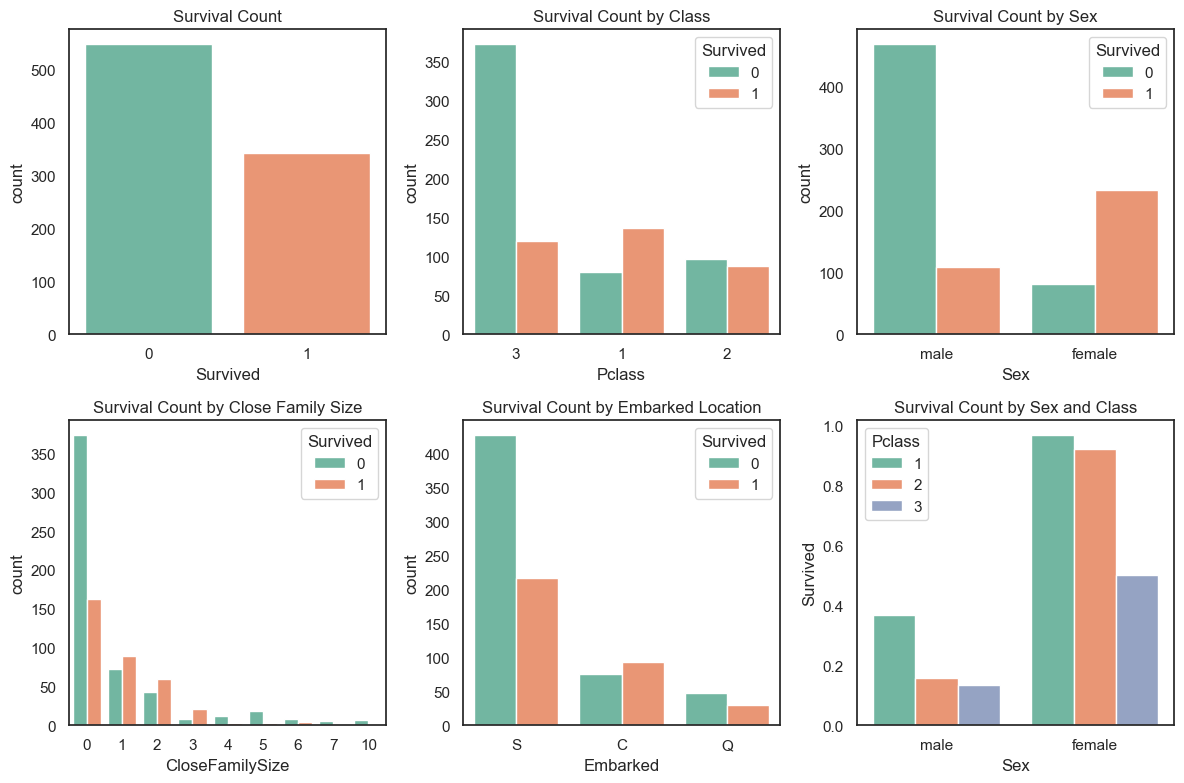

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Create a custom color palette
custom_palette = sns.color_palette(palette = "Set2")
sns.set_theme(style="white", palette=custom_palette)

#survival countplot
sns.countplot(x="Survived",data=df,ax=axes[0, 0])
axes[0, 0].set_title("Survival Count")

#survival countplot per class
sns.countplot(df, x="Pclass", hue=df['Survived'].astype(str),ax=axes[0, 1])
axes[0,1].set_title("Survival Count by Class")

#survival countplot per sex
sns.countplot(df, x="Sex", hue=df['Survived'].astype(str),ax=axes[0, 2])
axes[0,2].set_title("Survival Count by Sex");

#Survival Rate by Sex and Class
df['Pclass'] = df['Pclass'].astype(str)
sns.barplot(data=df, x="Sex", y="Survived", errorbar=None,hue='Pclass',ax=axes[1, 2], hue_order = ["1","2","3"])
axes[1,2].set_title("Survival Count by Sex and Class")

#not great correlation for parch and sibspo
#maybe close family size parch + sib + yourself make it more obvious
df["CloseFamilySize"] = df["SibSp"] + df["Parch"]
sns.countplot(x="CloseFamilySize", data=df,hue=df['Survived'].astype(str),ax=axes[1, 0])
axes[1,0].set_title("Survival Count by Close Family Size")

#survival rate by embarked location
sns.countplot(x="Embarked", data=df,hue=df['Survived'].astype(str),ax=axes[1, 1])
axes[1,1].set_title("Survival Count by Embarked Location")

# Adjust layout
plt.tight_layout()
plt.show()


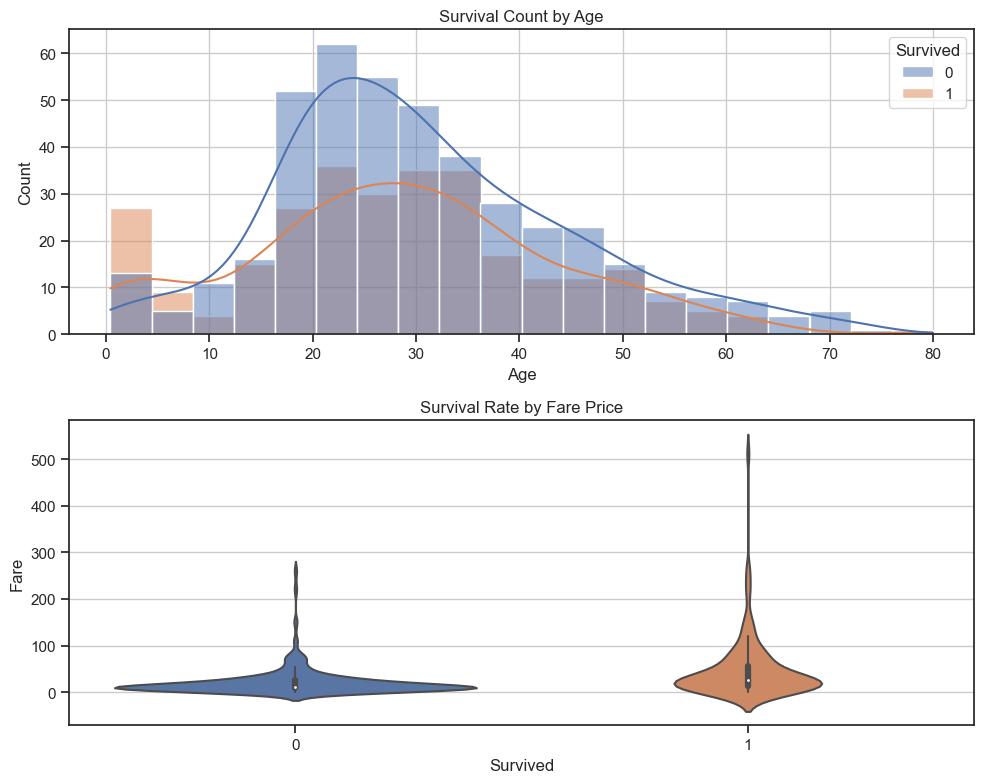

In [63]:
#histogram plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
#set colours 
sns.set_style("ticks",{'axes.grid' : True})

#Survival Count by Age
sns.histplot(df, x="Age", hue="Survived", kde=True, ax=axes[0])
axes[0].set_title("Survival Count by Age")


sns.violinplot(data=df, x="Survived", y = "Fare", split=True, gap=.1,ax=axes[1])
axes[1].set_title("Survival Rate by Fare Price")


# Adjust layout
plt.tight_layout()
plt.show()

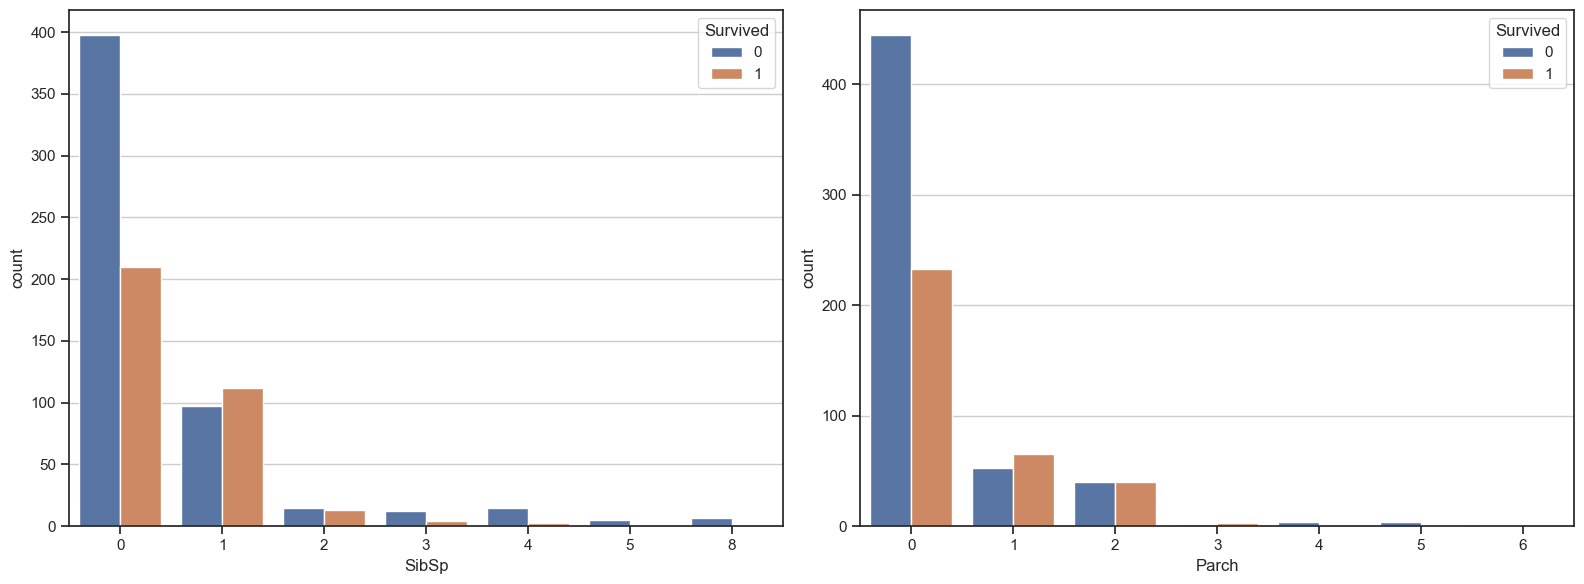

In [64]:
#Count of SibSp & Parch
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x="SibSp", data=df,hue=df['Survived'].astype(str), ax=axes[0])
sns.countplot(x="Parch", data=df,hue=df['Survived'].astype(str), ax=axes[1])
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Object Data types

Some features with objects can be converted straight into numbers through encoding: Sex and Embarked

In [65]:
print(df['Name'].head(15)) #drop - all unique - no way to group/classify
print(df['Sex'].head(15)) #Few variants so can encode categorical variables into numerical representations
print(df['Ticket'].head(15)) #Get first letter of ticket (ticket type?)
print(df['Cabin'].dropna().head(15)) #drop - too many nulls
print(df['Embarked'].head(15)) #Few variants so can encode categorical variables into numerical representations

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object
0       male
1     female
2     female
3     female
4       male
5       male
6       male
7       male
8     female
9     female
10  

#### Catagorize Ticket

Ticket
3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: count, dtype: int64


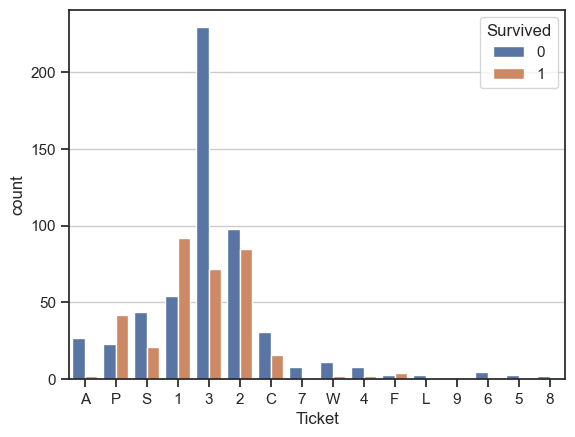

In [66]:
#Catagorize by first character of each ticket
ticketType = df['Ticket'].str[0]

ticket = pd.DataFrame(ticketType)
print(ticketType.value_counts())

#plot of first letter of ticket against survival 
ticket['Survived'] = df['Survived']
sns.countplot(x="Ticket", data=ticket,hue=ticket['Survived'].astype(str))
plt.show()

## Feature Engineering

In [16]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


#### Feature engineering

In [17]:
#Create ticket type feature with first character of ticket
train['TicketType'] = train['Ticket'].str[0]
test['TicketType'] = test['Ticket'].str[0]

#### Encoding objects into integers
Embarked (one-hot), sex (binary), ticketType (Frequency Encoding)

In [18]:
# Grouping Ticket by frequency
#train set
encodedTicket = train.groupby('TicketType').size() / len(train)
train.loc[:, "EncodedTicket"] = train['TicketType'].map(encodedTicket)
#test set
encodedTicket = test.groupby('TicketType').size() / len(test)
test.loc[:, "EncodedTicket"] = test['TicketType'].map(encodedTicket)

#Grouping Sex by binary encoding
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
#train set
train['SexBinary'] = label_encoder.fit_transform(train['Sex'])
#test set
test['SexBinary'] = label_encoder.fit_transform(test['Sex'])

#Grouping Embarked by one hot encoding
#fill 2 null values with mode before encoding 
embarked_mode = train['Embarked'].mode()[0]  # Calculate mode
train['Embarked'].fillna(embarked_mode, inplace=True)  # Fill NaNs with mode

#train set
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked', drop_first=False)
#test set
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked', drop_first=False)


Drop unwanted features

In [19]:
#make train and test features the same
train.drop(["Survived", "Name", "PassengerId","Cabin", "Sex", "Ticket", "TicketType"], axis=1, inplace=True)
test.drop(["Name","PassengerId","Cabin","Sex", "Ticket", "TicketType"], axis=1, inplace=True)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Age            714 non-null    float64
 2   SibSp          891 non-null    int64  
 3   Parch          891 non-null    int64  
 4   Fare           891 non-null    float64
 5   EncodedTicket  891 non-null    float64
 6   SexBinary      891 non-null    int32  
 7   Embarked_C     891 non-null    bool   
 8   Embarked_Q     891 non-null    bool   
 9   Embarked_S     891 non-null    bool   
dtypes: bool(3), float64(3), int32(1), int64(3)
memory usage: 48.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            332 non-null    float64
 2   SibSp 

#### Filll in null values
* The **Cabin** feature is getting dropped and **Embarked** nulls have been filled with its mode before one-hot encoding
* **Age** and **Fare** null values will be filled with iterative imputer

In [20]:
#iterative imputer
imputer = IterativeImputer(
        missing_values=np.nan,
        random_state=0,
        n_nearest_features=3,
        max_iter=20,
        sample_posterior=True,
    )
train_imputed = imputer.fit_transform(train)
test_imputed = imputer.fit_transform(test)

# Convert imputed values back to DataFrame
train = pd.DataFrame(train_imputed, columns=train.columns)
test = pd.DataFrame(test_imputed, columns=test.columns)


In [21]:
#No null values
#only features to be used are in DF
print(train.info())
print(test.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    float64
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    float64
 3   Parch          891 non-null    float64
 4   Fare           891 non-null    float64
 5   EncodedTicket  891 non-null    float64
 6   SexBinary      891 non-null    float64
 7   Embarked_C     891 non-null    float64
 8   Embarked_Q     891 non-null    float64
 9   Embarked_S     891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    float64
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    flo

,Pclass,Age,SibSp,Parch,Fare,EncodedTicket,SexBinary,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,0.032548,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.072952,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.072952,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.163861,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.337823,1.0,0.0,0.0,1.0


## Model Training

### Cross validation & Grid search 
* Use grid search to check for most appropriate hyperparameters
* Apply cross validation at the same time 

#### Set up models and hyperparameters

In [27]:
#split into training and testing sets
X = train.values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# All models to apply
models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(random_state=0, objective='binary:logistic')
}

# Models' hyperparameters for grid search
param_grids = {
    "Logistic Regression": [
        {
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__solver': ['liblinear']
        },
        {
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'logisticregression__penalty': ['l2'],
            'logisticregression__solver': ['lbfgs']
        }
    ],
    "Decision Tree": {
        'decisiontreeclassifier__criterion': ['gini', 'entropy'],
        'decisiontreeclassifier__max_depth': [None, 5, 10, 20, 30],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
        'decisiontreeclassifier__max_features': ['sqrt', 'log2', None]
    },
    "Random Forest": {
        'randomforestclassifier__n_estimators': [100, 200],
        'randomforestclassifier__max_depth': [2, 4, 5, 8],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8, 16],
        'randomforestclassifier__max_features': ['sqrt', 'log2', None],
        'randomforestclassifier__bootstrap': [True, False]
    },
    "Support Vector Machine": {
            'svc__C': [0.1, 1, 10, 100],
            'svc__kernel': ['linear']
    },
    "K-Nearest Neighbors": {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 10],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'kneighborsclassifier__p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
    },
    "XGBoost": {
        'xgbclassifier__n_estimators': [50, 100, 200, 300],
        'xgbclassifier__max_depth': [3, 4, 5, 6],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgbclassifier__subsample': [0.5, 0.7, 1],
        'xgbclassifier__colsample_bytree': [0.5, 0.7, 1],
        'xgbclassifier__gamma': [0, 0.1, 0.2, 0.3]
    }
}

#### Grid Search

In [28]:
#Loop through models and perform GridSearchCV
#Remove model names in front of parameter names from grid search
def strip_prefix(param_dict):
    return {key.split("_", 2)[-1]: value for key, value in param_dict.items()}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    #pipeline
    pipeline = make_pipeline(model)
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], scoring='accuracy', cv=5, n_jobs=4)
    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    # Strip the prefixes for other models use
    best_parameters = strip_prefix(grid_search.best_params_)
    
    best_models[name] = {
        "best_accuracy": best_accuracy,
        "best_parameters": best_parameters
    }
    print(f"Highest Accuracy: {round(best_models[name]['best_accuracy'], 3)}")
    

Training Logistic Regression...
Highest Accuracy: 0.796
Training Decision Tree...
Highest Accuracy: 0.829
Training Random Forest...
Highest Accuracy: 0.836
Training Support Vector Machine...
Highest Accuracy: 0.792
Training K-Nearest Neighbors...
Highest Accuracy: 0.716
Training XGBoost...
Highest Accuracy: 0.843


### Prediction

In [30]:
#Apply best model to test set 
originaltest = pd.read_csv("data/test.csv")

#Get best grid searched model
model = models['XGBoost']
best_params = best_models['XGBoost']['best_parameters']
model.set_params(**best_params)

#Predict model from whole test set
model.fit(X, y)
predictions = model.predict(test.values)

try:
    output = pd.DataFrame({'PassengerId': originaltest.PassengerId, 'Survived': predictions})
    output.to_csv('data/submission.csv', index=False)
except Exception:
    print("Failed to save csv")
else:
    print("Your submission was successfully saved!")

Your submission was successfully saved!


Current submission score = 0.74401

In [38]:
originaltest = pd.read_csv("data/submission.csv")
originaltest.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
